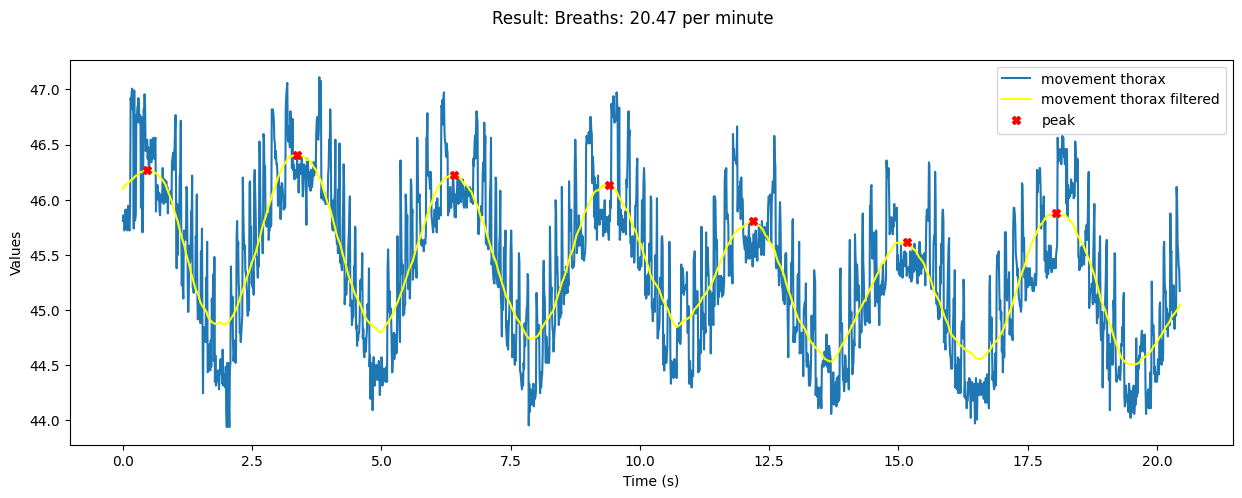

In [1]:
import pandas as pd
from scipy import signal
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import numpy as np

# Read file
data = pd.read_csv('v2_atmung_3.csv')

# Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

#Filterung der Daten
sgf = signal.savgol_filter(d_values, window_length=250, polyorder=2, mode="nearest")
peaks, _ = find_peaks(sgf,  height=45.25, distance=125)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Atemzüge pro Minute berechnen
breaths = 60 / np.mean(time_diffs)

# Create a figure and set its size to 15x5 in.
fig, ax2 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Breaths: {breaths:.2f} per minute')

# Plot a line chart
ax2.plot(time_series, d_values, label='movement thorax')
ax2.plot(time_series, sgf, label='movement thorax filtered', color="yellow")
ax2.plot(time_series[peaks], sgf[peaks], 'X', label='peak', color='red')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Values')
ax2.legend()

# Show plot
plt.show()

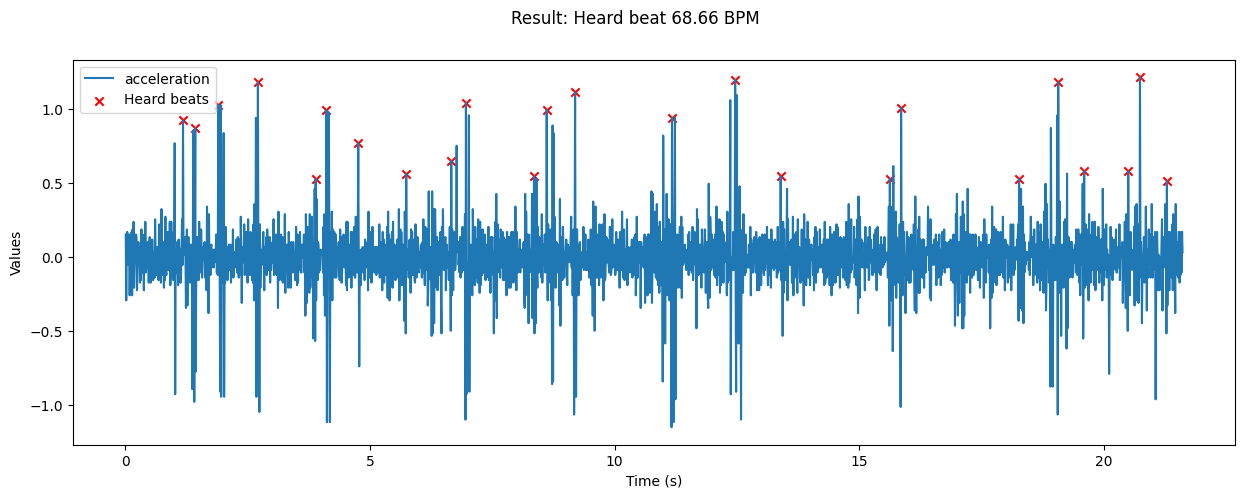

In [2]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks
import matplotlib.pyplot as plt

# Read file  , nrows=1000
data = pd.read_csv('v2_herz_1.csv')

# Werte aus der CSV-Datei extrahieren
d_values = data['D']

# Künstliche Zeitreihe erstellen
time_series = np.arange(len(data)) * 0.01  # 10 Millisekunden pro Eintrag

# Ableitung der Beschleunigung berechnen
acceleration = d_values.diff()

# Peaks in der Beschleunigung finden
peaks, _ = find_peaks(acceleration, height=0.5, distance=20)

# Zeitdifferenzen zwischen aufeinanderfolgenden Peaks auf der künstlichen Zeitreihe berechnen
time_diffs = np.diff(time_series[peaks])

# Herzschlagfrequenz in BPM (Beats Per Minute) berechnen
heartbeats = 60 / np.mean(time_diffs)

# Plot erstellen
fig, ax1 = plt.subplots(figsize=(15,5))
fig.suptitle(f'Result: Heard beat {heartbeats:.2f} BPM')

ax1.plot(time_series, acceleration, label='acceleration')
ax1.scatter(time_series[peaks], acceleration.iloc[peaks], c='r', marker='x', label='Heard beats')
ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Values')
ax1.legend()

# Diagramm anzeigen
plt.show()

